# RED WINE QUALITY_XGBRegresion

## 01| Dataset Information

__About Dataset:__

Dataset Kualitas Anggur berisi informasi tentang berbagai sifat fisikokimia anggur. Seluruh dataset dikelompokkan menjadi dua kategori: anggur merah dan anggur putih. Setiap anggur memiliki label kualitas yang terkait dengannya. Label berada dalam kisaran 0 hingga 10. Namun pada dataset ini, kita hanya menggunakan varian anggur merah.

__Features Description:__

* __Fixed acidity:__ Menunjukkan jumlah asam tartarat dalam anggur dan diukur dalam g/dm3
* __Volatile acidity:__ Menunjukkan jumlah asam asetat dalam anggur. Diukur dalam g/dm3.
* __Citric acid:__ Menunjukkan jumlah asam sitrat dalam anggur. Itu juga diukur dalam g/dm3.
* __Residual sugar:__ Menunjukkan jumlah gula yang tersisa dalam anggur setelah proses fermentasi selesai. Itu juga diukur dalam g/dm3.
* __Free sulfur dioxide:__ Mengukur jumlah belerang dioksida (SO2) dalam bentuk bebas. Itu juga diukur dalam g/dm3.
* __Total sulfur dioxide:__ Mengukur jumlah total SO2 dalam anggur. Bahan kimia ini bekerja sebagai agen antioksidan dan antimikroba.
* __Density:__ Menunjukkan kepadatan anggur dan diukur dalam g/dm3.
* __PH:__ Menunjukkan nilai pH anggur. Kisaran nilainya antara 0 hingga 14. Nilai 0 menunjukkan keasaman sangat tinggi, dan nilai 14 menunjukkan keasaman basa.
* __Sulphates:__ Menunjukkan jumlah kalium sulfat dalam anggur. Itu juga diukur dalam g/dm3.
* __Alcohol:__ Menunjukkan kandungan alkohol dalam anggur.
* __Quality:__ Menunjukkan kualitas anggur, yang berkisar dari 1 hingga 10. Di sini, semakin tinggi nilainya, semakin baik anggurnya.



## 02| Import Library

In [131]:
# Library math and visual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

# Library sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Library jcopml
from jcopml.tuning import random_search_params as rsp
from jcopml.pipeline import num_pipe,cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from warnings import filterwarnings
filterwarnings('ignore')

## Load Dataset

In [117]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Jika dilihat type data dari setiap atribut sudah sesuai

In [54]:
#melihat statistik deskriptif
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Kualitas wine yg diproduksi kebanyakan memiliki taraf nilai 5 dari 10 (normal). dari kadungan gulanya jenis wine termasuk dalam golongan Extra Sec (Very Dry: 1.5%-3%) dan tergolong dalam light bodied wine (alkohol < 12%).
Sumber: https://cellar.asia dan https://www.pelajaricaranya.com

,missing_value,%
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


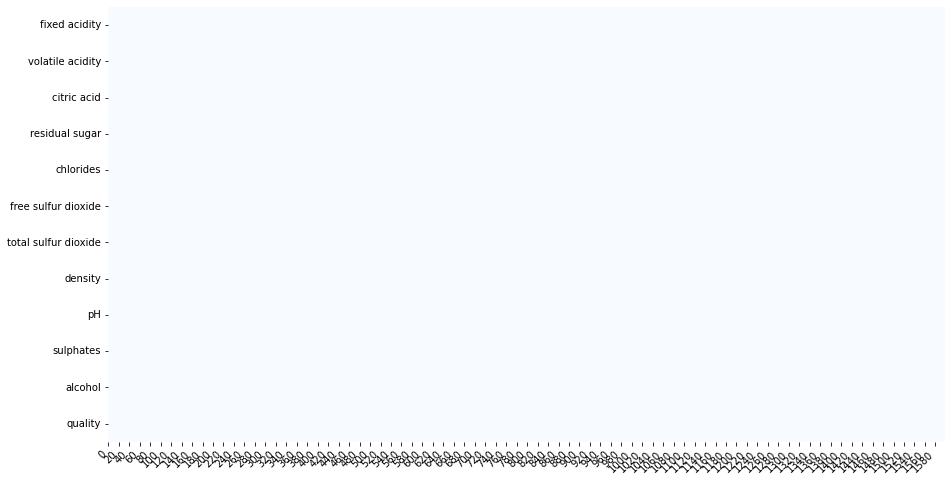

In [55]:
# mendeteksi missing value
plot_missing_value(df, return_df=True)

Dari dataset yg kita punya, semua data terisi lengkap atau tidak ada missing value

In [56]:
#Melihat data duplikat.
df.duplicated().sum()

240

Sebanyak 240 data duplikat. Pada kasus ini data duplikat tidak akan dihandling, karena suatu hal lumrah jika data wine memiliki kualitas yang sama. Bahkan menjadi suatu hal yang bagus jika bisa mengontrol dan membuat semuanya sama.

## 03| Exploratory Data Analisys (EDA)

#### Hal2 umum dalam melihat kualitas wine:
Sebelum jauh melakukan EDA, perlu untuk mengetahui jenis parameter umum dalam menentukan kualitas wine khususnya red wine.
* __Kadar alkohol__
  1. Light bodied wine: < 12,5% 
  2. Medium bodied wine: 12,5% – 13,5% 
  3. Full bodied wine: 13,5%
  
 
* __Kandungan gula__
  1. very2 dry = 0.5 %– 1,5 %
  2. very dry = 1,5% – 3%
  3. dry = 3% – 5 %
  4. sweet = 5% - 7%
  5. very sweet = > 7%
  
  
* __Kekentalan__

Text(0.5, 1.0, 'Fitur data target')

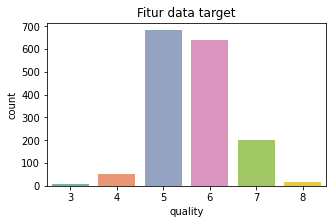

In [57]:
# visualisasi kolom quality
plt.figure(figsize=(5,3))
sns.countplot(df.quality, palette='Set2')
plt.title('Fitur data target')

Data target terdiri dari beberapa kualitas dari range 3-8. Karena dataset ini berasal dari satu jenis wine yang sama yaitu red wine, maka kita akan membuatnya menjadi 2 kategori saja. Untukka tegori Baik '1' (1-5), sedangkan Buruk '0' (6-10).

In [118]:
# mapping data target
df.quality = [0 if i <= 5 else 1 for i in df.quality]
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

Setelah dimapping, kolom quality hanya terdiri dari 2 kategori.

In [59]:
# Dataframe berdasarkan hal umum untuk melihat kualitas wine
data = df[['residual sugar','density','alcohol','quality']] 

# Bining data berdasarkan kandungan gula dan alkohol
data['sugar level'] = pd.cut(data['residual sugar'], bins=[0,1.5,3,5,7,20], labels=['very2 dry', 'very dry', 'dry','sweet','very sweet'])
data['alcohol level'] = pd.cut(data['alcohol'], bins=[0,12.5,13.5,20], labels=['light bodied','medium bodied','full bodied'])

# Menampilkan 5 data teratas
data.head()

,residual sugar,density,alcohol,quality,sugar level,alcohol level
0,1.9,0.9978,9.4,0,very dry,light bodied
1,2.6,0.9968,9.8,0,very dry,light bodied
2,2.3,0.9970,9.8,0,very dry,light bodied
3,1.9,0.9980,9.8,1,very dry,light bodied
4,1.9,0.9978,9.4,0,very dry,light bodied


#### Taraf Alcohol

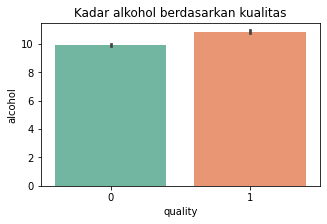

In [60]:
# Visualisasi kategori kadar gula
plt.figure(figsize=(5,3))
sns.barplot(data['quality'], data['alcohol'], palette='Set2')
plt.title('Kadar alkohol berdasarkan kualitas')
plt.show()

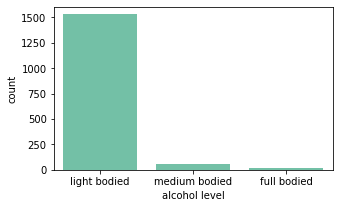

In [61]:
# Visualisasi kategori kadar alkohol 
plt.figure(figsize=(5,3))
sns.countplot(data['alcohol level'], color='mediumaquamarine')
plt.show()

#### Taraf Gula

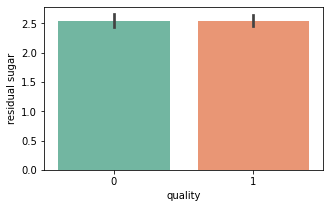

In [62]:
# Visualisasi kategori kadar gula
plt.figure(figsize=(5,3))
sns.barplot(data['quality'], data['residual sugar'], palette='Set2')
plt.show()

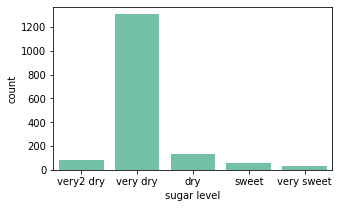

In [63]:
# Visualisasi kategori kadar gula
plt.figure(figsize=(5,3))
sns.countplot(data['sugar level'], color='mediumaquamarine')
plt.show()

#### Taraf kekentalan

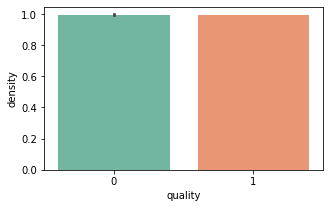

In [64]:
# Visualisasi kategori kadar gula
plt.figure(figsize=(5,3))
sns.barplot(data['quality'], data['density'], palette='Set2')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa kualitas wine yg diproduksi memiliki kekentalan yg sama. Wine juga memiliki kandungan gula yg sama dan cenderung berjenis Extra Sec (Very Dry: 1.5%-3%). Kandungan alkohol juga tergolong dalam light bodied wine (alkohol < 12%). Make sense saja karena dataset kita merupakan satu jenis yg sama yaitu red wine (anggur merah). 

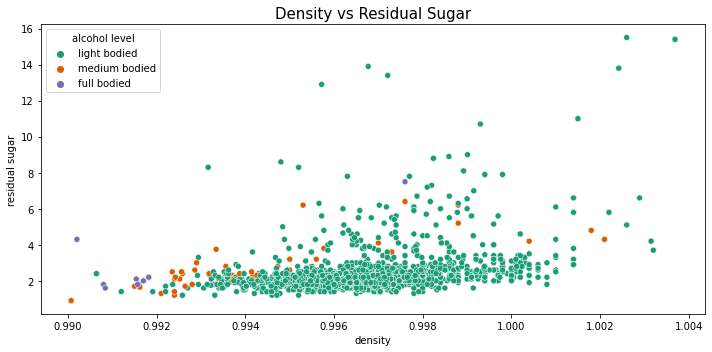

In [65]:
# visualisasi scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='density', y='residual sugar', hue='alcohol level', palette='Dark2', )
plt.title('Density vs Residual Sugar', fontsize=15)
plt.tight_layout()
plt.show()

* Wine full bodied lebih cair dan memiliki kandungan gula yg rendah.
* Wine medium bodied tergolong sedang untuk kekentalan dan kandungan gula
* Wine light bodied tergolong kental dan tinggi kandungan gula.

In [66]:
#Copy dataset
df_new = df.copy()
# Menambahkan range kualitas wine (low, mid, high)
df_new['level quality'] = df_new.quality.map({0:'low quality', 1:'high quality'})
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,low quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,low quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,low quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,high quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,low quality


In [67]:
# Group dataset berdasarkan level quality
df_new.drop(columns='quality').groupby('level quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
level quality,,,,,,,,,,,
high quality,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029
low quality,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478


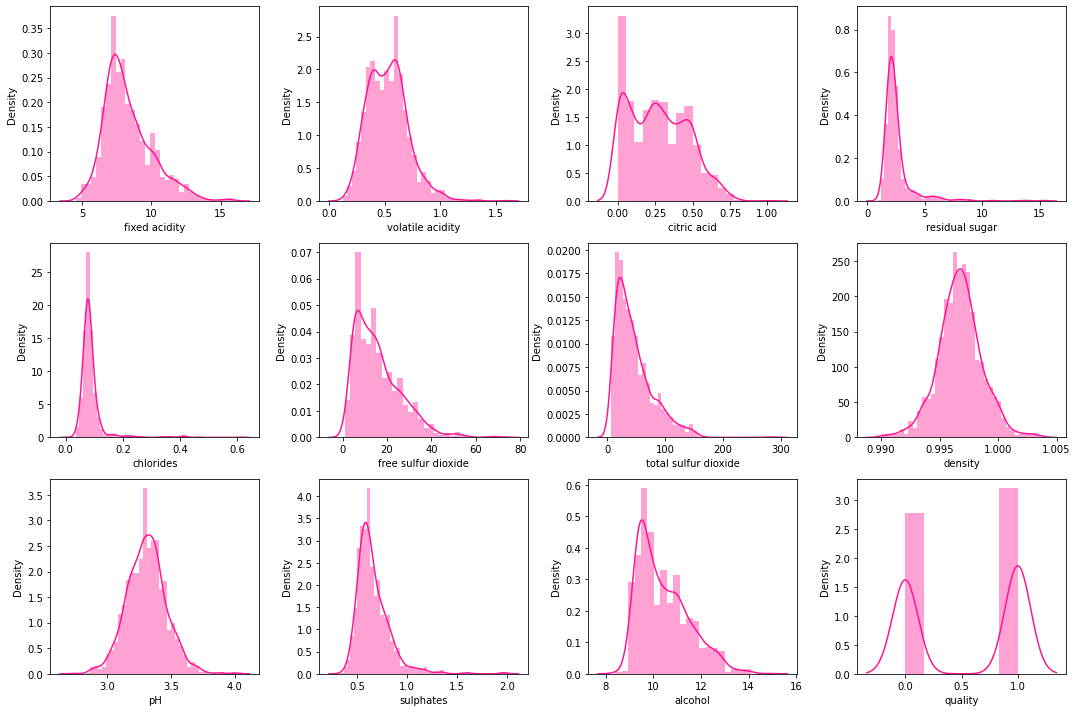

In [68]:
# Visualisasi dengan distplot untuk melihat distribusi data
plt.figure(figsize=(15,10))
for i in enumerate(df.describe().columns):
  plt.subplot(3,4, i[0]+1)
  sns.distplot(df[i[1]], color='deeppink', kde=True)
plt.tight_layout()
plt.show()

In [69]:
# Melihat korelasi dari setiap fitur dataset
quality_corr = df.corr()['quality'].sort_values(ascending=False)
print(quality_corr)

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64


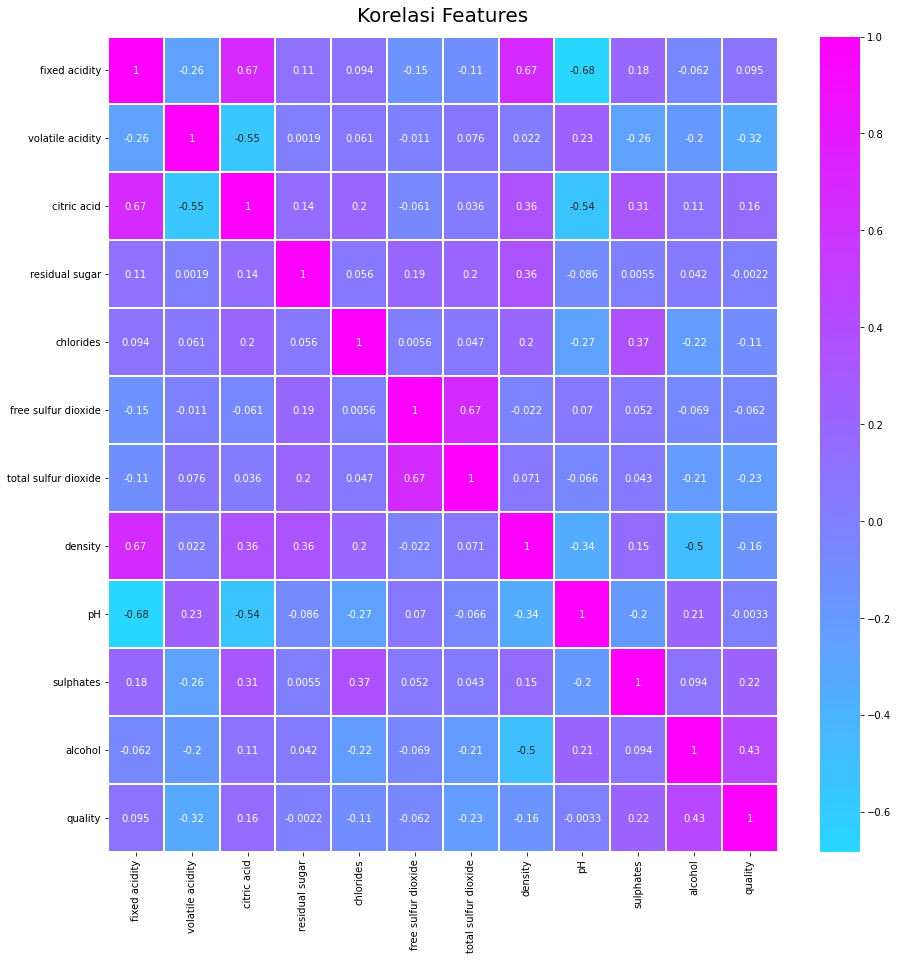

In [70]:
# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.2,
            cbar=True,
            cmap="cool",
            center=0)
plt.title('Korelasi Features', fontsize=20, pad=15)
plt.show()

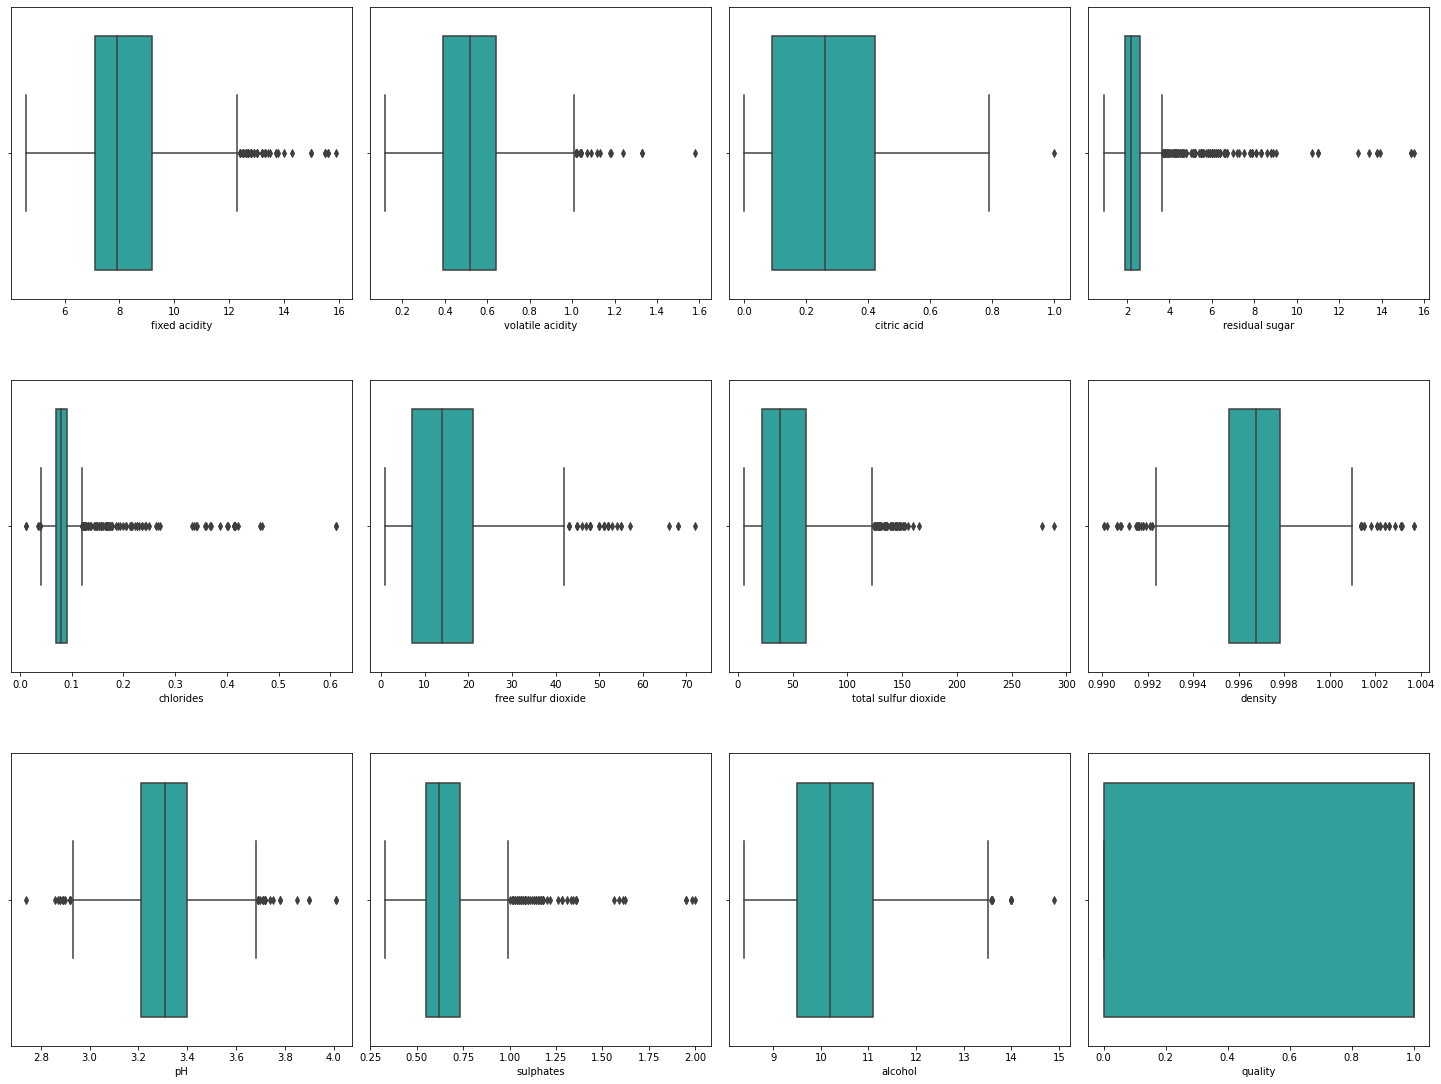

In [71]:
# Melihat outlier
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(x=col, data=df, color='lightseagreen', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [72]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [73]:
df_clear_iqr = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clear_iqr.shape[0]

1194

In [74]:
df.shape[0]

1599

## 04| Splitting Data

In [105]:
X = df_clear_iqr.drop(columns='quality')
y = df_clear_iqr['quality']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((955, 11), (239, 11), (955,), (239,))

## 05| Building and Evaluation Model

In [112]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 70, 'algo__max_features': 0.245099158528604, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 141}
0.9916230366492147 0.7602143753737768 0.8493723849372385


In [78]:
#Prediksi dan assign ke y_pred
y_pred = model.predict(X_test)

In [96]:
#Evaluasi model
print('Nilai confusion matrix: \n')
print(confusion_matrix(y_test, y_pred))
print('\nNilai classification report: \n')
print(classification_report(y_test, y_pred))

Nilai confusion matrix: 

[[ 93  17]
 [ 19 110]]

Nilai classification report: 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.87      0.85      0.86       129

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



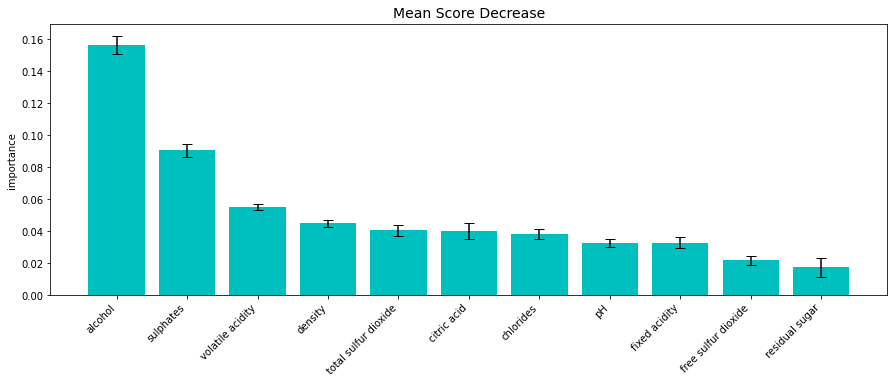

In [82]:
# Visualisasi feature importance
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

Dari visualisasi tersebut, terlihat bahwa semua fitur sangat pengaruh dalam pemodelan algoritma machine learning

## 06| Prediksi menggunakan model

Oke kita akan coba dan cocokkan hasil prediksi menggunakan model yang sudah kita buat. Data prediksi yang kita pakai menggunakan sample data dari dataset secara acak.

In [181]:
df_acak = df.sample(frac=0.005, random_state=42)
df_acak

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,1
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,0
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,1
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,1
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,0
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,0
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,0


In [182]:
# Mencoba data baru dari dataset
data_baru = df_acak.drop(columns='quality')
data_baru

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0


In [184]:
# Prediksi dan menampilkan data hasil prediksi
file = df_acak.copy()
file['prediksi'] = pd.DataFrame(model.predict(data_baru)).values
# Menampilkan Data
file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediksi
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,1,1
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,0,0
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,1,1
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,0,0
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,1,1
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,0,0
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,0,0
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,0,0


Dari data diatas, prediksi menunjukkan benar semua. Namun akan ada kemungkinan salah, karena performa atau tingkat keakuratan dari model yang kita buat hanya sebesar 85%.

By muhamadsahri08@gmail.com